Se importan las librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
Cargamos el dataset

In [39]:
anuncio = pd.read_csv("advertising.csv")
anuncio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [40]:
anuncio.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0




EL DATASET DESCRIBE EL COMPORTAMIENTO DE LOS USUARIOS QUE PERMANECEN EN UN SITIO WEB (EN HORAS) Y LAS VECES QUE DAN CLIC A UN ANUNCIO

Visualizamos los datos a traves de distintas gráficas utilizando pair plot

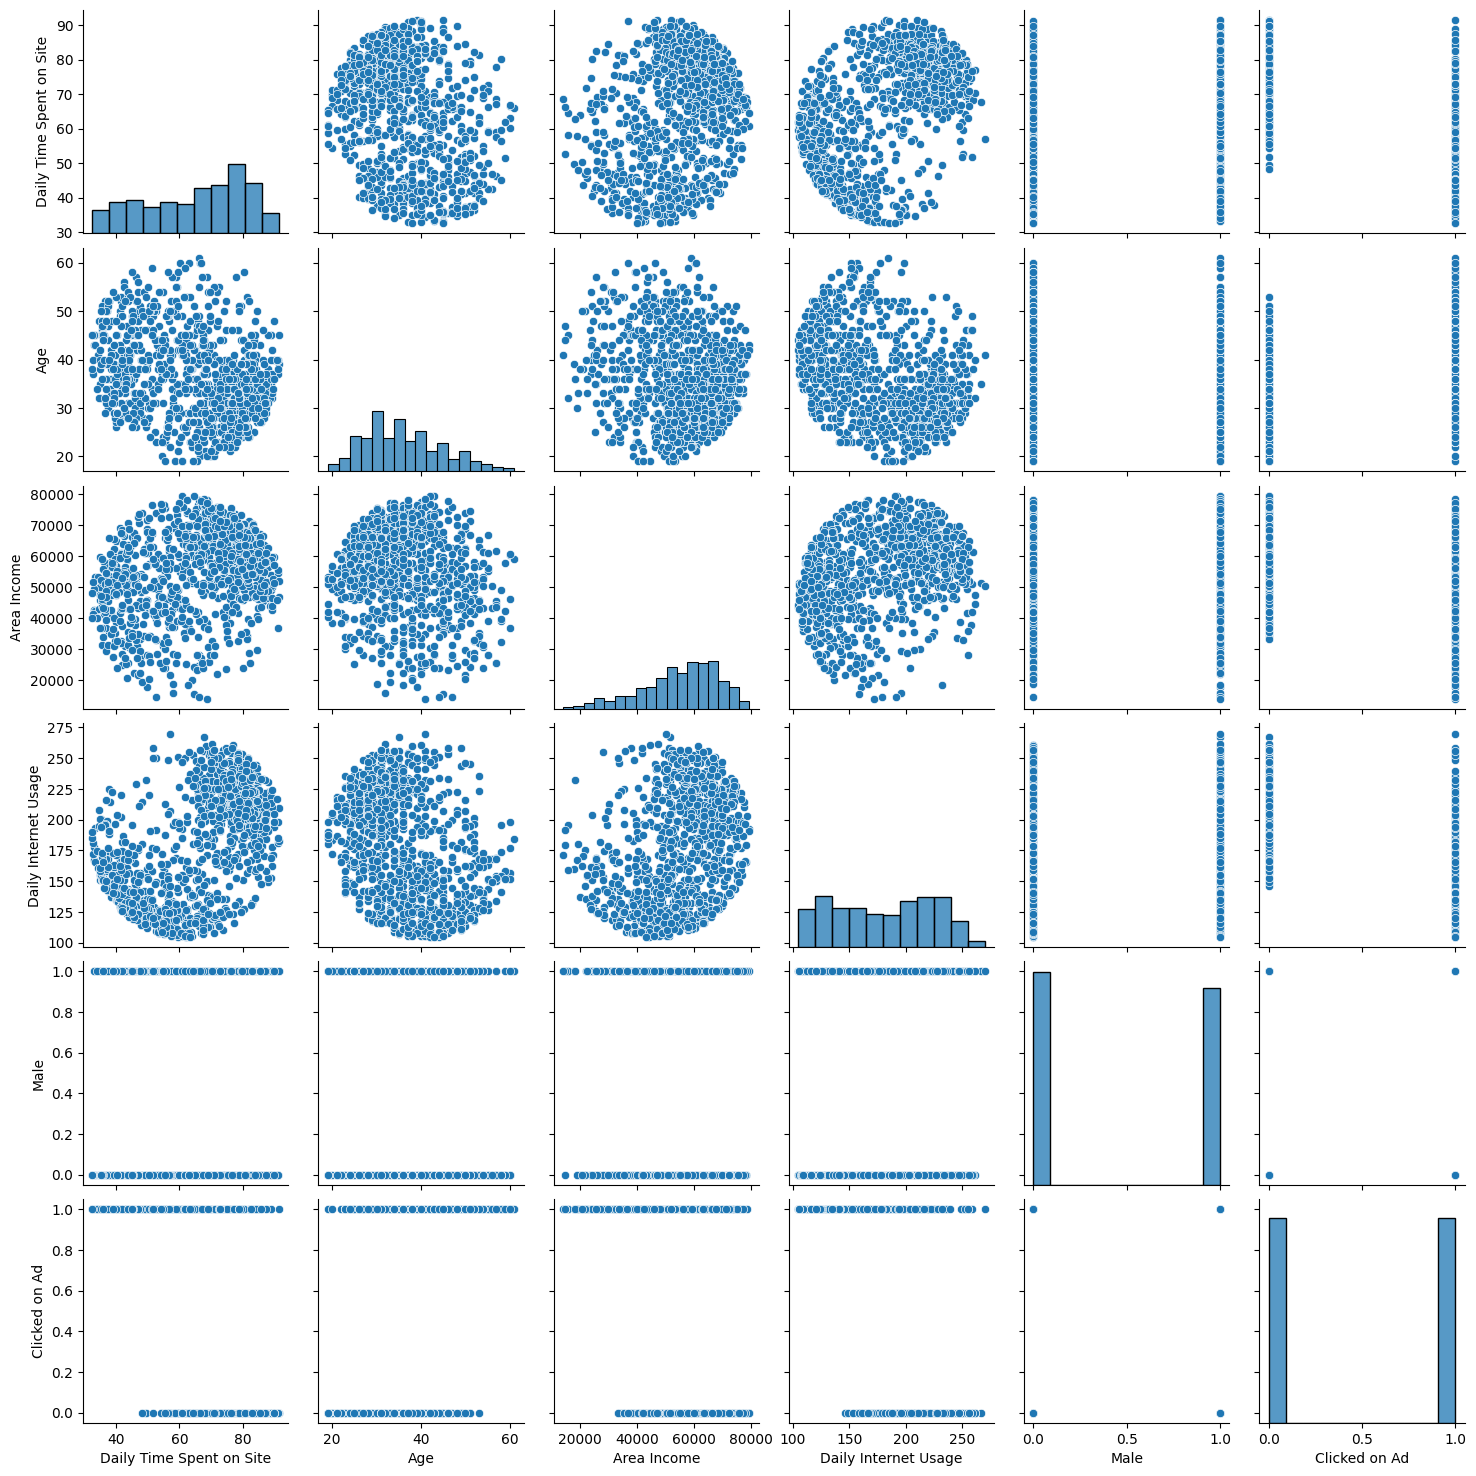

In [41]:
sns.pairplot(anuncio);

Visualizamos la matriz de correlación con un mapa de calor 

<ipython-input-42-e54b114886c9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(anuncio.corr(), annot = True, vmin = -1, cmap = 'Blues');


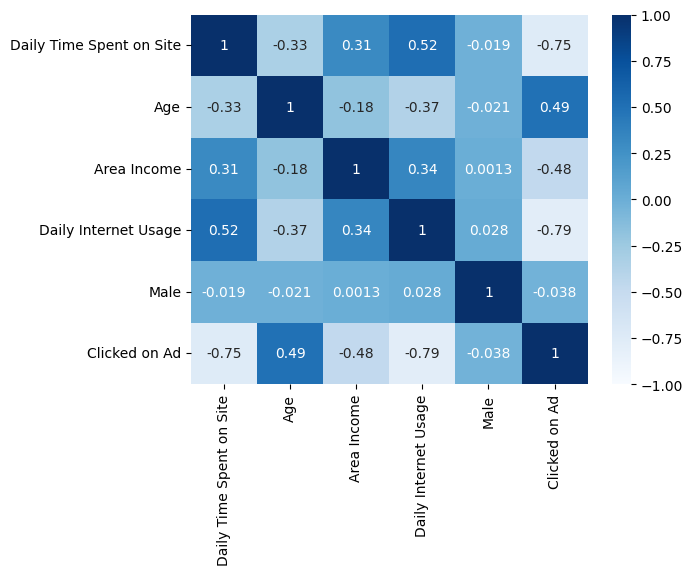

In [42]:
sns.heatmap(anuncio.corr(), annot = True, vmin = -1, cmap = 'Blues');

Vamos a utilizar la variable Daily Time Spent on Site y Clicked on Ad que son las que muestran mejor el comportamiento de los datos. Con el metodo regplot() se mostrará el grafico de la regresión lineal

(0.0, 1.3666818254615876)

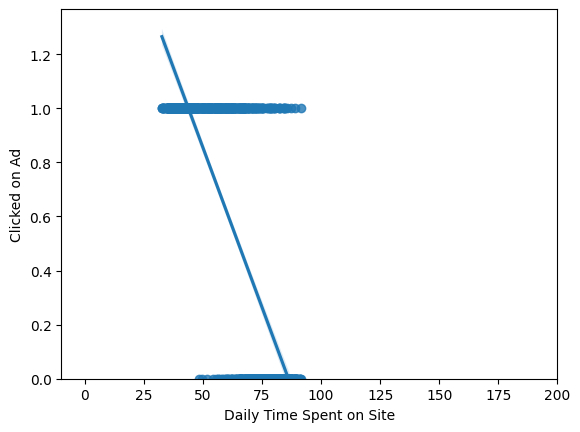

In [43]:
sns.regplot(x = "Daily Time Spent on Site",
            y = "Clicked on Ad",
            data = countries,
            dropna = True)
plt.xlim(-10, 200)
plt.ylim(bottom=0)

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
model = LinearRegression(fit_intercept=True)


In [46]:
LinearRegression()

LinearRegression()

Creamos la matriz de features  y el vector target para ajustar nuestro modelo de regresión lineal simple.

In [64]:
# Creamos las variables:
feature_cols = ['Daily Time Spent on Site']
X = anuncio[feature_cols]
y = anuncio['Clicked on Ad']

# Corroboramos la forma y tipo de cada una:
print('Shape X:', X.shape)
print('Type X:', type(X))
print('Shape y:', y.shape)
print('Type y:', type(y))

Shape X: (1000, 1)
Type X: <class 'pandas.core.frame.DataFrame'>
Shape y: (1000,)
Type y: <class 'pandas.core.series.Series'>


Se utiliza la función train_test_split() para que el modelo aprenda a través de los datos y el entrenamiento para posteriormente hacer la predicción

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 1)

In [51]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

Utilizamos el método fit para que el usuario explore los atributos de la clase 


In [52]:
model.fit(Xtrain, ytrain)

LinearRegression()

In [53]:
LinearRegression()


LinearRegression()

In [63]:
model.intercept_ 

1.9940093725884025

In [62]:
model.coef_ 

array([-0.02293972])

Posteriormente se predicen etiquetas para datos desconocidos

In [56]:
test = 20
model.intercept_ + model.coef_ * test

array([1.5352149])

In [61]:
test_sklearn = np.array(test).reshape(-1,1) 
test_sklearn

array([[20]])

In [58]:
ypred = model.predict(Xtest)
ypred

array([ 0.06913717,  0.84518801,  0.56853495,  0.72429567,  0.00536473,
       -0.09694643,  0.45957126,  0.25426073,  0.89519661,  0.6054679 ,
        0.54330125,  1.03673471,  0.24577304,  0.16984255,  0.19002951,
        0.15194957,  0.73507734,  0.29234068,  1.04269903,  0.40933327,
        0.96676855,  0.18727674,  0.73324216,  0.80229073,  0.97709143,
        0.98167937,  0.0078881 ,  0.74631781,  0.96791554,  1.17987858,
        0.18704734,  0.44534863,  1.10096593,  1.06862092,  0.3815762 ,
        0.21044586,  0.14988499,  0.70479691,  0.47723485,  0.16319003,
        0.12923924,  0.12258672,  0.23774413,  0.78508594,  1.1200059 ,
        0.12258672,  0.09482966,  0.62450787,  0.32078593,  0.34556083,
        0.14804981,  1.15969163, -0.04762603,  0.70617329,  0.83968248,
        1.15693886,  0.06776078,  0.33019122,  0.57587566,  0.99383742,
        0.31069245,  0.97709143,  0.01247605,  0.22191572,  0.19232348,
        0.62703124,  0.3320264 ,  0.16640159,  0.89886697, -0.00

Se evalua el perfomance del modelo comparando las predicciones con los valores reales

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [60]:
print('MAE:', mean_absolute_error(ytest, ypred).round(2))
print('MSE:', mean_squared_error(ytest, ypred).round(2))
print('RMSE:', np.sqrt(mean_squared_error(ytest, ypred)).round(2))
print('R2:', r2_score(ytest, ypred).round(2))

MAE: 0.24
MSE: 0.09
RMSE: 0.3
R2: 0.63
